In [88]:
import numpy as np
import pandas as pd
import sklearn
import catboost

Remove the NAN values from the csv manually as they are some(4)
Don't use Dollar signs or any special characters for the numerical values because it will effect the output

In [89]:
seed = 33
np.random.seed(seed)

In [90]:
df = pd.read_csv("/Users/thrilok/Desktop/mantra_collab_job/work_files/latest_broko_code/Dataset/residential_dataset_bd.csv")
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176641 entries, 0 to 176640
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ML_Number       176641 non-null  object 
 1   Postal_Code     176477 non-null  object 
 2   Tax Year        176637 non-null  float64
 3   Tax             176641 non-null  float64
 4   Basement1       176641 non-null  object 
 5   Bedrooms        176641 non-null  int64  
 6   Days_On_Market  176640 non-null  float64
 7   Exterior1       175705 non-null  object 
 8   Garage_Type     149193 non-null  object 
 9   Rooms           175900 non-null  float64
 10  Type            176641 non-null  object 
 11  Washrooms       176641 non-null  int64  
 12  Sold_Date       176640 non-null  object 
 13  Sold_Price      176641 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 18.9+ MB


In [91]:
# df['Importance_Days_On_Market'] = pd.cut(
#     df['Days_On_Market'],
#     bins=[-1, 3, 8, 14, 21, 30, float('inf')],
#     labels=[1, 2, 3, 4, 5, 6],
#     right=False
# )
#Sold Date Feature
# df['Sold_Date'] = pd.to_datetime(df['Sold_Date'])
# df['Year'] = df['Sold_Date'].dt.year
# df['Month'] = df['Sold_Date'].dt.month
# df['Day'] = df['Sold_Date'].dt.day


#Postal_Code, Tax, Basement1, Bedrooms, Days_On_Market, Exterior1, Garage_Type, Rooms, Type, Washrooms


drop_cols = ['ML_Number','Sold_Date',"Tax Year"]
df = df.drop(drop_cols, axis=1)
df.isnull().sum()

Postal_Code         164
Tax                   0
Basement1             0
Bedrooms              0
Days_On_Market        1
Exterior1           936
Garage_Type       27448
Rooms               741
Type                  0
Washrooms             0
Sold_Price            0
dtype: int64

In [92]:
data = df.dropna(axis = 0, how ='any') 

In [93]:
data.isnull().sum()

Postal_Code       0
Tax               0
Basement1         0
Bedrooms          0
Days_On_Market    0
Exterior1         0
Garage_Type       0
Rooms             0
Type              0
Washrooms         0
Sold_Price        0
dtype: int64

In [94]:
X = data.drop('Sold_Price',axis=1)
y = data['Sold_Price']

In [95]:
feature_names = list(X.columns)
n_features  = len(feature_names)
#categorical features
cat_features = [column for column, dtype in X.dtypes.items() if dtype==object]

In [96]:
small_pool = catboost.Pool(X, y, cat_features=cat_features, feature_names=feature_names)

In [97]:
iterations_count=10

common_params = {
    'random_seed': seed,
    'grow_policy': 'Lossguide',
    'objective': 'RMSE',
    'iterations': iterations_count,
    'depth': n_features-1,
}

In [98]:
def get_weights(n_features, base=1.1):
    return list([(1/base)**lvl for lvl in range(n_features)])

In [102]:
cb_with_weights = catboost.CatBoostRegressor(
    **common_params,
    feature_weights=get_weights(n_features),
    one_hot_max_size=65355
)

In [103]:
cb_with_weights.fit(small_pool)

Learning rate set to 0.5
0:	learn: 523330.3130871	total: 126ms	remaining: 1.13s
1:	learn: 442301.7107904	total: 258ms	remaining: 1.03s
2:	learn: 407952.4167762	total: 368ms	remaining: 858ms
3:	learn: 387476.6890419	total: 485ms	remaining: 727ms
4:	learn: 376748.5858071	total: 596ms	remaining: 596ms
5:	learn: 372295.5155176	total: 678ms	remaining: 452ms
6:	learn: 370958.7470411	total: 756ms	remaining: 324ms
7:	learn: 364883.2628231	total: 851ms	remaining: 213ms
8:	learn: 363828.6641881	total: 929ms	remaining: 103ms
9:	learn: 360851.9001034	total: 1.02s	remaining: 0us


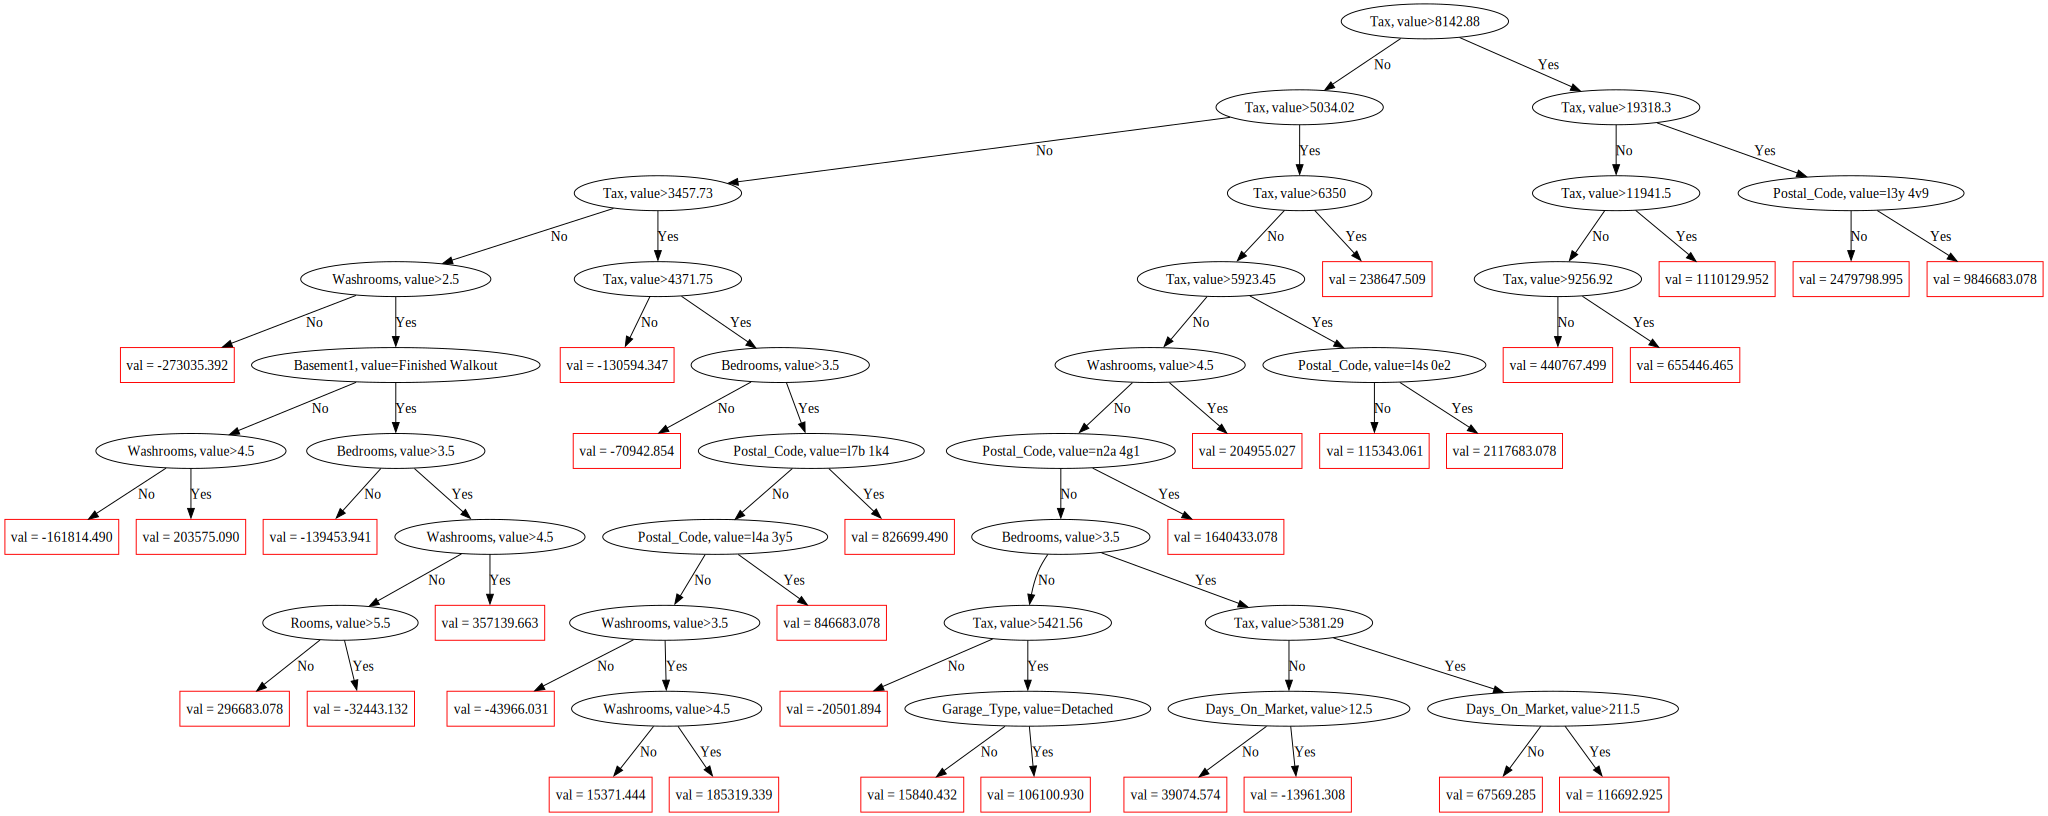

In [104]:
cb_with_weights.plot_tree(tree_idx=0, pool=small_pool)